In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import IPython.display as ipd
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

### Let's explore the dataset shall we?
Music conoeisseurs have been trying for a long time to understand sound and what differenciates one song from another. How to visualize sound. What makes a tone different from another.

In this notebook we will go through an in depth analysis of sound and how we can **classify and ultimately understand** it.

I suggest you to use the internet before asking a doubt. Most of your doubts will disappear once you read the documentation or search StackOverflow! 

**Note**: Pay close attention to the markdown cells and the comments.

In [ ]:
data = pd.read_csv(f'SA2021_W4_Music.csv')
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.63090,1972.744388,117335.77160,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.69087,2010.051501,65671.87567,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.43760,2084.565132,75124.92172,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.28450,1960.039988,82913.63927,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.26765,1948.503884,60204.02027,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [ ]:
data.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.380000e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455789,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130862e-03,2712.581883,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


#### 0. What is the shape of the dataset?

In [ ]:
data.shape

(9990, 59)

## Since we now know basic EDA, let's try to visualize this dataset:

1. #### Plot Correlation heatmap for all the mean variables [Columns based on Mean]:



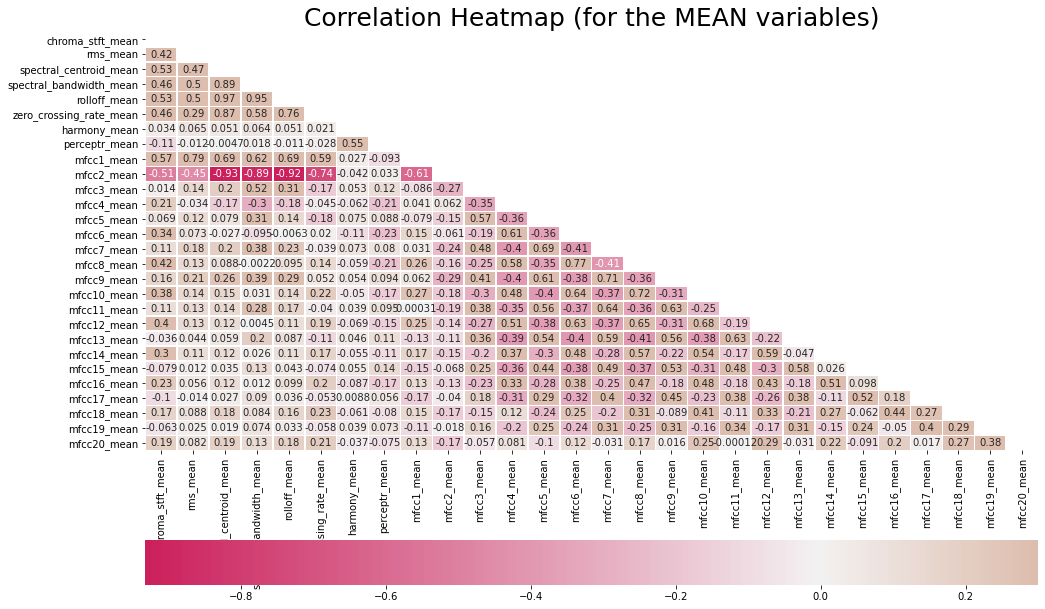

In [ ]:
#Solution

cols = [col for col in data.columns if 'mean' in col]
corr = data[cols].corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
             linewidths=.5, cbar_kws= {'orientation': 'horizontal'})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
# plt.savefig("Heatmap.jpg")

2. #### Draw a Countplot for the labels column

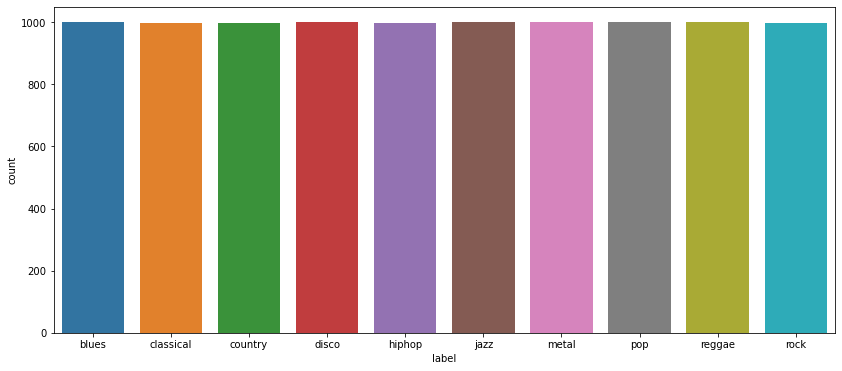

In [ ]:
#Solution

plt.figure(figsize=(14,6))
sns.countplot(data.label);

3. #### Draw a boxplot for the tempo vs labels column. Think carefully about what a boxplot represents.

Text(0, 0.5, 'BPM')

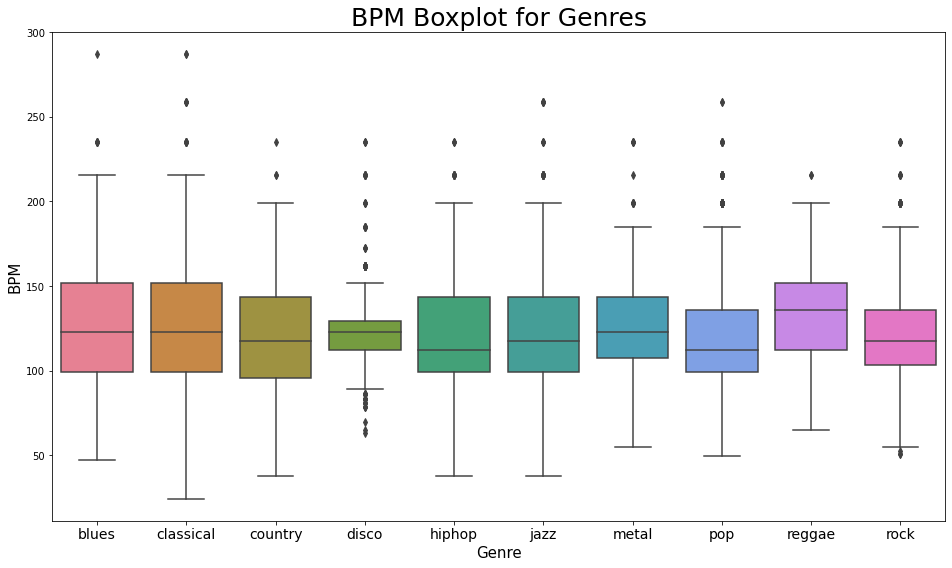

In [ ]:
#Solution

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = data, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)

Again, understand what a boxplot exactly represents. (Outlier analysis)

#### What seems to be the problem? Too many features (dimensions)? Tell us your thoughts:

Don't worry, you'll be learning this soon!

**Solution**: Principal Component Analysis!

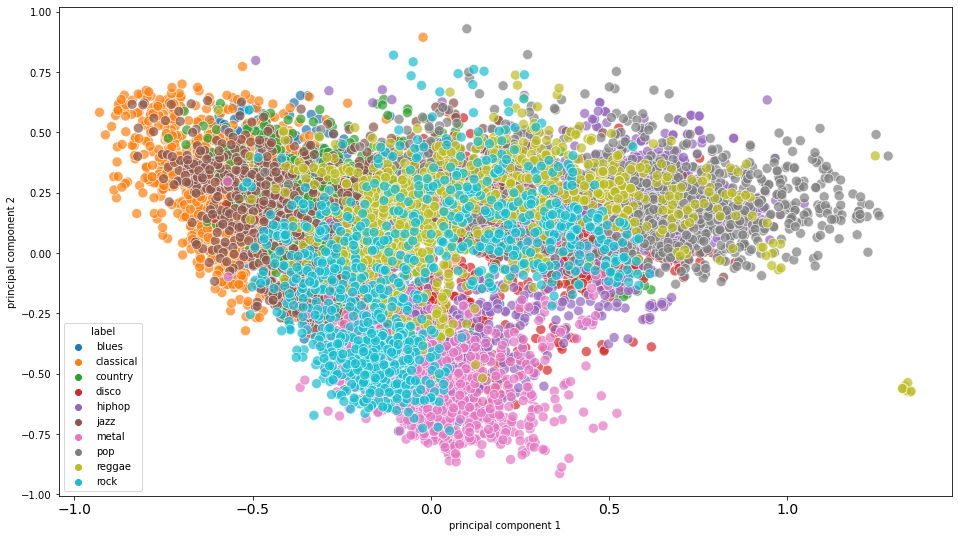

In [ ]:
from sklearn import preprocessing

y = data['label']
X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y], axis = 1)

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

# plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
# plt.xlabel("Principal Component 1", fontsize = 15)
# plt.ylabel("Principal Component 2", fontsize = 15)
# plt.savefig("Scatter.jpg")

The plots differ because they belong to slightly different datasets.

Do not worry :-) We were just trying to check your intuition. You will learn this in the upcoming week!

### Now let's perform Machine Learning Classification. We'll be predicting the genre based on the given features.

In [ ]:
# These are the import statements referred to below:

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [ ]:
data = pd.read_csv(r'dataset.csv')
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.63090,1972.744388,117335.77160,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.69087,2010.051501,65671.87567,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.43760,2084.565132,75124.92172,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.28450,1960.039988,82913.63927,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.26765,1948.503884,60204.02027,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


### Preprocess the data.

Be careful when you play around with the cell below. Your final outputs depend on this.

In [ ]:
# DO NOT EDIT THIS CELL

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print("SHAPE:",data.shape) # Why did the shape change? What happened?

y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

SHAPE: (3442, 59)


Also pay attention to the preprocessing step. What did we exactly do?

**We performed outlier analysis!**

### Splitting the dataset: Do you know what stratify does?

In [ ]:
# DO NOT EDIT THIS CELL

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = y,test_size=0.1, random_state=42)

### Creating a Predefined function to assess the accuracy of a model. This will be the scoring function

In [ ]:
def score(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
#     print(confusion_matrix(y_test, preds))
    accuracy = round(accuracy_score(y_test, preds), 5)
    print('Accuracy for', title, ':', accuracy, '\n')

This function trains/fits the model by itself. Just pass the model as shown below.

### Let's see how a basic Logistic Regressor works on this!

In [ ]:
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
score(lg, "Logistic Regression")

Accuracy for Logistic Regression : 0.74493 



The accuracy hovers around 74%. Do you think you can beat this? The kaggle microcourses would've surely taught you more than this!

#### Now it's your turn. Train the following: 

4. **AdaBoostClassifier** with n_estimators=1000 & random_state=0
5. **RandomForestClassifier** with n_estimators=1000, max_depth=10, random_state=0

**IMPORTANT**: Use the default values for other hyper parameters apart from these. Do **NOT** change these values 

In [ ]:
# AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators=1000,random_state=0)
score(ab,'Ada Boost')

Accuracy for Ada Boost : 0.32464 



In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
score(rf,'Random Forest')

Accuracy for Random Forest : 0.84348 



AdaBoost performs poorly, but Random Forest looks great!

#### Now look at the import statements. There may be a few models you may or may not have seen. Use those models to beat the score you achieved in the cell above! Play around with their hyper parameters.

We suggest going through their documentations before using them.

In [ ]:
# Naive Bayes: GaussianNB
nb = GaussianNB()
score(nb, "Naive Bayes")

# KNN: KNeighborsClassifier
knn = KNeighborsClassifier()
score(knn, "KNN")

# Decission trees: DecisionTreeClassifier
tree = DecisionTreeClassifier()
score(tree, "Decission trees")

Accuracy for Naive Bayes : 0.52464 

Accuracy for KNN : 0.84348 

Accuracy for Decission trees : 0.65797 



6. Did you beat the score yet? Chances are you couldn't. Prove us wrong! Use **XGBClassifier** with n_estimators=1000 and learning_rate=0.05

In [ ]:
# XGBClassifier
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
score(xgb, "XGBClassifier")

[17:36:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy for XGBClassifier : 0.87246 



You should've beaten the score by now. Now, heres a task for you. Try **XGBRFClassifier** on your own.

In [ ]:
# XGBRFClassifier
xgbrf = XGBRFClassifier(n_estimators=1000, learning_rate=0.05)
score(xgbrf, "XGBRFClassifier")

[17:38:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy for XGBRFClassifier : 0.7913 



### Till now, it looks like XGBClassifier performs the best. Let's experiment with it a bit more.

7. Plot the Confusion Matrix for XGBClassifier with parameters n_estimators=1000, learning_rate=0.05

In [ ]:
y_test.value_counts()

country      57
disco        51
rock         43
metal        40
blues        37
jazz         30
hiphop       28
reggae       21
classical    19
pop          19
Name: label, dtype: int64

[17:38:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy : 0.87246 



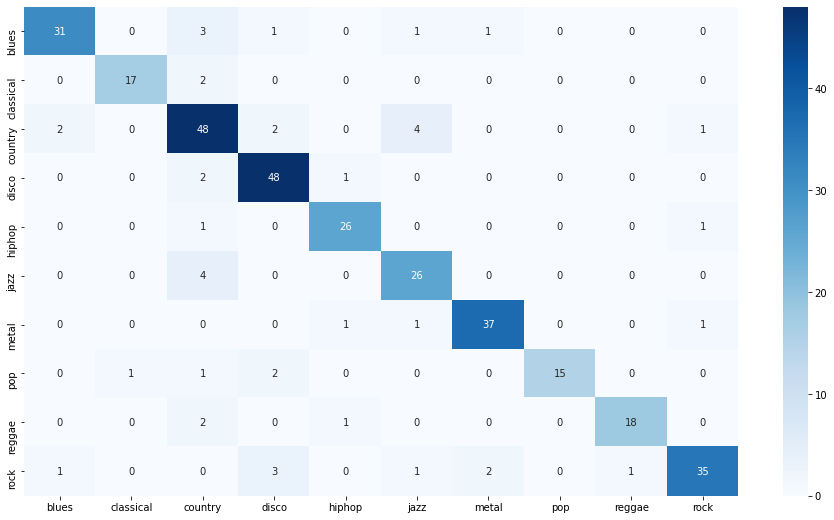

In [ ]:
# Solution

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train, y_train)

preds = xgb.predict(X_test)

print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

# Confusion Matrix
confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);

8. Find the feature importance for XGBClassifier. 

*Hint: It's an inbuilt member variable*

In [ ]:
#Solution

pd.DataFrame({'Features':X.columns,"Importance":xgb.feature_importances_}).sort_values(by = ['Importance'],ascending=False)

,Features,Importance
16,perceptr_var,0.060205
5,spectral_centroid_mean,0.039747
24,mfcc4_mean,0.039501
7,spectral_bandwidth_mean,0.037832
18,mfcc1_mean,0.032424
9,rolloff_mean,0.030949
34,mfcc9_mean,0.029816
1,chroma_stft_mean,0.029484
10,rolloff_var,0.028015
20,mfcc2_mean,0.027936


### Quiz Solutions:

1. Most Correlated Features:
2. Least Correlated Features:

In [ ]:
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()
mx = 0
mxi = -1
mxj = -1
mi = 1
mii = -1
mij = -1
for i in range(len(spike_cols)):
    for j in range(len(spike_cols)):
        if(i!=j):
            if abs(corr.values[i,j]) >= mx:
                mxi = i
                mxj = j
                mx = abs(corr.values[i,j])
            if abs(corr.values[i,j] )<= mi:
                mii = i
                mij = j
                mi = abs(corr.values[i,j]) 
                
print("Most Correlated Feature:",spike_cols[mxi],spike_cols[mxj],":",mx)
print("Least Correlated Columns:",spike_cols[mii],spike_cols[mij],":",mi)

Most Correlated Feature: rolloff_mean spectral_centroid_mean : 0.9743495559507951
Least Correlated Columns: mfcc11_mean rms_mean : 0.001178899657339948


3. Which class has the highest frequency?

Refer to the countplot above

4. Features with the most outliers:

In [ ]:
data = pd.read_csv(f'dataset.csv')

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum().sort_values(ascending=False)

harmony_mean               2175
perceptr_mean              1461
zero_crossing_rate_var      906
rms_var                     904
mfcc20_var                  676
mfcc19_var                  655
mfcc18_var                  636
perceptr_var                632
spectral_centroid_var       593
mfcc17_var                  582
mfcc16_var                  558
harmony_var                 533
mfcc15_var                  524
mfcc14_var                  475
mfcc13_var                  470
rolloff_var                 445
mfcc12_var                  445
spectral_bandwidth_var      443
mfcc1_var                   442
mfcc2_var                   441
mfcc3_var                   429
mfcc10_var                  408
mfcc7_var                   407
mfcc5_var                   402
mfcc6_var                   399
mfcc4_var                   389
mfcc11_var                  384
mfcc9_var                   381
mfcc8_var                   373
mfcc1_mean                  319
mfcc20_mean                 280
chroma_s

5. Can we plot the given dataset on your laptop screen as a scatterplot? Justify your answer!

At this moment we can't. Because the number of dimensions, i.e., features of the dataset exceeds 2 (the dimenion of our laptop screen). Hence to draw the scatterplot, we need to learn Principal Component Analysis. Refer above!

6. Score for AdaBoost with hyperparameters: n_estimators=1000 & random_state=0

Refer above

7. Score for Random Forest with hyperparameters: n_estimators=1000, max_depth=10, random_state=0

Refer above

8. Score for XGBClassifier with hyperparameters: n_estimators=1000 & learning_rate = 0.05

Refer above

9. Class with Highest accuracy
10. Class with Highest Precision

Refer to confusion matrix above

In [ ]:
from sklearn.metrics import classification_report

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train, y_train)

[17:43:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
preds = xgb.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

       blues       0.91      0.84      0.87        37
   classical       0.94      0.89      0.92        19
     country       0.76      0.84      0.80        57
       disco       0.86      0.94      0.90        51
      hiphop       0.90      0.93      0.91        28
        jazz       0.79      0.87      0.83        30
       metal       0.93      0.93      0.93        40
         pop       1.00      0.79      0.88        19
      reggae       0.95      0.86      0.90        21
        rock       0.92      0.81      0.86        43

    accuracy                           0.87       345
   macro avg       0.90      0.87      0.88       345
weighted avg       0.88      0.87      0.87       345



11. Most Important Feature
12. Least Important Feature

Refer above